# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import os
os.chdir(r'C:\Users\bruna\IronHack\GitHub\data-ft-par-labs\Labs\data')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('Employees.csv')

In [3]:
employees.head()

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [11]:
# Method 1
# your code here
employees.groupby('Department')[['Salary']].mean().round(2)

,Salary
Department,
Admin,76.33
HR,74.24
IT,70.67
Sales,73.13


In [6]:
# Method 2
# your code here
employees.groupby('Department').Salary.describe().T.round(2)

Department,Admin,HR,IT,Sales
count,123.00,122.00,134.00,121.00
mean,76.33,74.24,70.67,73.13
std,25.73,26.52,27.41,27.82
min,30.00,30.00,30.00,30.00
25%,53.50,50.25,46.25,49.00
50%,78.00,74.50,69.00,69.00
75%,98.00,96.00,97.75,95.00
max,120.00,119.00,120.00,120.00


In [13]:
employees.pivot_table(index = 'Department', values= 'Salary').round(2)



,Salary
Department,
Admin,76.33
HR,74.24
IT,70.67
Sales,73.13


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [14]:
employees.pivot_table(columns = ['Department'], index = ['Title'], values = 'Salary' ).round(2)


Department,Admin,HR,IT,Sales
Title,,,,
Analyst,77.74,71.40,69.6,76.07
VP,75.57,75.44,74.0,66.68
associate,75.81,75.93,68.1,76.81


In [16]:
employees.pivot_table(index=['Department', 'Title'], values='Salary').round(2)

Salary
Department Title            
Admin      Analyst     77.74
           VP          75.57
           associate   75.81
HR         Analyst     71.40
           VP          75.44
           associate   75.93
IT         Analyst     69.60
           VP          74.00
           associate   68.10
Sales      Analyst     76.07
           VP          66.68
           associate   76.81

In [17]:
employees.groupby(['Department', 'Title'])[['Salary']].mean().T.round(2)

Department   Admin                       HR                       IT        \
Title      Analyst     VP associate Analyst     VP associate Analyst    VP   
Salary       77.74  75.57     75.81    71.4  75.44     75.93    69.6  74.0   

Department             Sales                   
Title      associate Analyst     VP associate  
Salary          68.1   76.07  66.68     76.81

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [18]:
# your code here
employees.pivot_table( index = ['Title'], columns = ['Years'],values = 'Salary' ).round(2)


Years,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Title,,,,,,,,,,,,,,,
Analyst,75.00,63.38,73.39,77.60,77.62,87.44,67.00,78.00,86.45,73.67,71.18,68.64,69.57,70.00,71.20
VP,74.71,83.20,69.00,82.33,80.00,61.07,78.69,54.18,65.67,70.40,79.36,76.22,87.00,74.79,72.27
associate,77.33,83.25,83.56,73.30,64.33,74.45,70.17,69.50,76.09,73.94,73.75,77.70,62.22,62.80,64.50


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [21]:
# your code here

employees.pivot_table( index = ['Department'], columns = ['Title'],values = 'Salary' , 
                      aggfunc = ['mean', 'count']).round(2)


mean                    count              
Title      Analyst     VP associate Analyst  VP associate
Department                                               
Admin        77.74  75.57     75.81      38  42        43
HR           71.40  75.44     75.93      42  34        46
IT           69.60  74.00     68.10      45  47        42
Sales        76.07  66.68     76.81      54  40        27

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [22]:
# your code here
employees.groupby(['Department', 'Title']).Salary.describe().T.round(2)

Department   Admin                        HR                        IT  \
Title      Analyst      VP associate Analyst      VP associate Analyst   
count        38.00   42.00     43.00   42.00   34.00     46.00   45.00   
mean         77.74   75.57     75.81   71.40   75.44     75.93   69.60   
std          26.34   24.93     26.52   25.09   26.59     28.06   28.42   
min          33.00   31.00     30.00   31.00   32.00     30.00   30.00   
25%          57.25   58.75     51.00   49.00   54.50     52.25   46.00   
50%          80.50   75.50     79.00   72.50   76.50     76.00   69.00   
75%         102.00   93.75     98.00   94.75  100.00     99.50   99.00   
max         120.00  120.00    119.00  119.00  119.00    119.00  119.00   

Department                     Sales                    
Title           VP associate Analyst      VP associate  
count        47.00     42.00   54.00   40.00     27.00  
mean         74.00     68.10   76.07   66.68     76.81  
std          25.57     28.56   27.86   27.02     28.27  
min          31.00     33.00   30.00   30.00     31.00  
25%          56.50     45.00   51.00   45.00     55.00  
50%          71.00     59.50   72.00   60.00     79.00  
75%          94.50     96.00  104.25   89.00     93.00  
max         120.00    117.00  120.00  119.00    120.00

In [26]:
pd.pivot_table(employees, index = ['Department', 'Title'], values = 'Salary', 
                    aggfunc=[np.mean, min, max, np.std]).round(2)


mean    min    max    std
                     Salary Salary Salary Salary
Department Title                                
Admin      Analyst    77.74     33    120  26.34
           VP         75.57     31    120  24.93
           associate  75.81     30    119  26.52
HR         Analyst    71.40     31    119  25.09
           VP         75.44     32    119  26.59
           associate  75.93     30    119  28.06
IT         Analyst    69.60     30    119  28.42
           VP         74.00     31    120  25.57
           associate  68.10     33    117  28.56
Sales      Analyst    76.07     30    120  27.86
           VP         66.68     30    119  27.02
           associate  76.81     31    120  28.27

In [28]:
pd.pivot_table(employees, index = ['Department'], columns= ['Title'], values = 'Salary', 
                    aggfunc=[np.mean, min, max, np.std]).T.round(2)


Department       Admin      HR      IT   Sales
     Title                                    
mean Analyst     77.74   71.40   69.60   76.07
     VP          75.57   75.44   74.00   66.68
     associate   75.81   75.93   68.10   76.81
min  Analyst     33.00   31.00   30.00   30.00
     VP          31.00   32.00   31.00   30.00
     associate   30.00   30.00   33.00   31.00
max  Analyst    120.00  119.00  119.00  120.00
     VP         120.00  119.00  120.00  119.00
     associate  119.00  119.00  117.00  120.00
std  Analyst     26.34   25.09   28.42   27.86
     VP          24.93   26.59   25.57   27.02
     associate   26.52   28.06   28.56   28.27

In [29]:
employees.groupby(['Title', 'Department']).Salary.describe().T.round(2)

Title      Analyst                              VP                          \
Department   Admin      HR      IT   Sales   Admin      HR      IT   Sales   
count        38.00   42.00   45.00   54.00   42.00   34.00   47.00   40.00   
mean         77.74   71.40   69.60   76.07   75.57   75.44   74.00   66.68   
std          26.34   25.09   28.42   27.86   24.93   26.59   25.57   27.02   
min          33.00   31.00   30.00   30.00   31.00   32.00   31.00   30.00   
25%          57.25   49.00   46.00   51.00   58.75   54.50   56.50   45.00   
50%          80.50   72.50   69.00   72.00   75.50   76.50   71.00   60.00   
75%         102.00   94.75   99.00  104.25   93.75  100.00   94.50   89.00   
max         120.00  119.00  119.00  120.00  120.00  119.00  120.00  119.00   

Title      associate                          
Department     Admin      HR      IT   Sales  
count          43.00   46.00   42.00   27.00  
mean           75.81   75.93   68.10   76.81  
std            26.52   28.06   28.56   28.27  
min            30.00   30.00   33.00   31.00  
25%            51.00   52.25   45.00   55.00  
50%            79.00   76.00   59.50   79.00  
75%            98.00   99.50   96.00   93.00  
max           119.00  119.00  117.00  120.00

In [30]:
employees.pivot_table(index = ['Department','Title'],values = 'Salary', 
                      aggfunc=['mean', max, min, 'std' ]).round(2)


mean    max    min    std
                     Salary Salary Salary Salary
Department Title                                
Admin      Analyst    77.74    120     33  26.34
           VP         75.57    120     31  24.93
           associate  75.81    119     30  26.52
HR         Analyst    71.40    119     31  25.09
           VP         75.44    119     32  26.59
           associate  75.93    119     30  28.06
IT         Analyst    69.60    119     30  28.42
           VP         74.00    120     31  25.57
           associate  68.10    117     33  28.56
Sales      Analyst    76.07    120     30  27.86
           VP         66.68    119     30  27.02
           associate  76.81    120     31  28.27

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [31]:
# your code here
employees.pivot_table(index = ['Department'], values = 'Salary', aggfunc = [len, sum])

,len,sum
,Salary,Salary
Department,,
Admin,123,9388
HR,122,9057
IT,134,9470
Sales,121,8849


In [32]:
employees.pivot_table(index = ['Department'], values = 'Salary', aggfunc = ['count', sum])

,count,sum
,Salary,Salary
Department,,
Admin,123,9388
HR,122,9057
IT,134,9470
Sales,121,8849


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [34]:
# your code here
employees.pivot_table( columns = ['Title'], index = ['Department'], 
                      values = ['Years', 'Salary'] , aggfunc={'Years': np.sum, 'Salary': np.mean}).round(2)



Salary                    Years               
Title      Analyst     VP associate Analyst   VP associate
Department                                                
Admin        77.74  75.57     75.81     292  342       306
HR           71.40  75.44     75.93     326  198       351
IT           69.60  74.00     68.10     346  409       336
Sales        76.07  66.68     76.81     441  293       138

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [39]:
# your code here
def drop_max(x):
    return x.sort_values()[:-1].mean()

drop_max(employees.Salary)

73.43486973947896

In [44]:
pd.pivot_table(employees, 
               index='Department', 
               values='Salary', 
               aggfunc=drop_max).round(2)

,Salary
Department,
Admin,75.97
HR,73.87
IT,70.30
Sales,72.74


In [47]:
employees.groupby('Department')[['Salary']].mean().round(2)

,Salary
Department,
Admin,76.33
HR,74.24
IT,70.67
Sales,73.13


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [48]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [49]:
# your code here
fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

In [50]:
fitbit.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.50,916.31,179.0,2698.00,2974.00,3233.00,4351.00
Steps,367.0,10121.59,5594.84,0.0,6730.50,10413.00,13916.50,26444.00
Distance,367.0,8.55,3.41,0.0,6.15,8.29,10.56,20.45
Floors,367.0,11.72,10.34,0.0,5.00,11.00,16.00,101.00
Minutes Sedentary,367.0,563.93,294.79,1.0,520.00,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.41,86.53,0.0,179.00,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.16,20.32,0.0,8.00,24.00,41.50,101.00
Minutes Very Active,367.0,35.72,31.01,0.0,10.50,29.00,54.00,153.00
Activity Calories,367.0,2044.15,2041.27,0.0,1218.50,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.48,154.75,0.0,224.00,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [51]:
# your code here
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

minute = fitbit['Minutes Very Active']
steps = fitbit.Steps

from scipy.stats import pearsonr

corr, _ = pearsonr(minute, steps)
print('Pearsons correlation: %.2f' % corr)

from scipy.stats import spearmanr

corr, _ = spearmanr(minute, steps)
print('Spearman correlation: %.2f' % corr)


Pearsons correlation: 0.57
Spearman correlation: 0.63


In [52]:
from scipy.stats import pearsonr

corr, _ = pearsonr(fitbit['Minutes Very Active'], fitbit.Steps)
print('Pearsons correlation: %.2f' % corr)

from scipy.stats import spearmanr

corr, _ = spearmanr(fitbit['Minutes Very Active'], fitbit.Steps)
print('Spearman correlation: %.2f' % corr)


Pearsons correlation: 0.57
Spearman correlation: 0.63


In [85]:
fitbit['Minutes Very Active'].corr(fitbit.Steps).round(3)

0.571

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [53]:
import matplotlib.pyplot as plt;

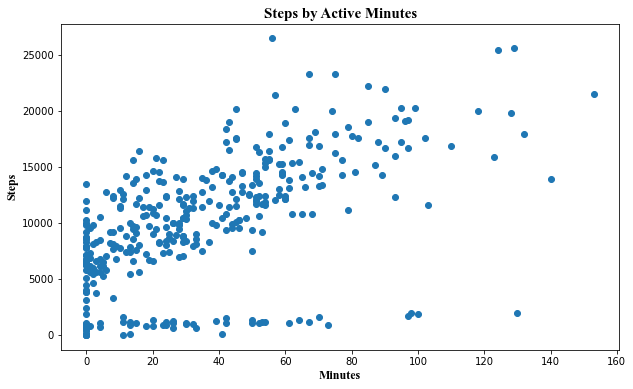

In [56]:
fig = plt.figure(figsize=(10,6))
plt.scatter(fitbit['Minutes Very Active'], fitbit.Steps)
plt.title('Steps by Active Minutes' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Minutes',  fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.ylabel('Steps', fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.show()


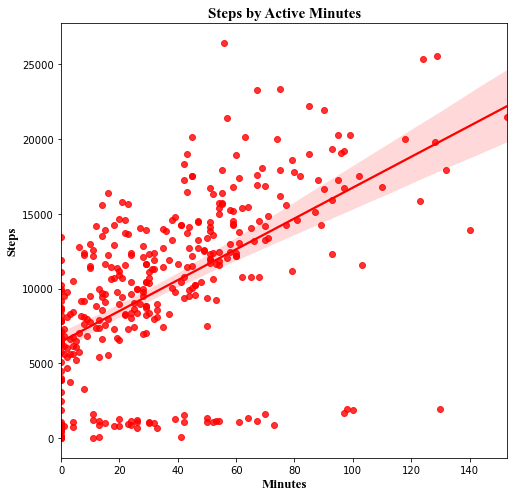

In [58]:
plt.figure(figsize=(8,8))
sns.regplot(data = fitbit, x = 'Minutes Very Active', y = 'Steps', color = 'r')
plt.title('Steps by Active Minutes' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Minutes',  fontweight = 'bold', fontsize = 13, fontname = 'times new roman')
plt.ylabel('Steps', fontweight = 'bold', fontsize = 13, fontname = 'times new roman')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

```Answer```

    There is a correlation between *Minutes Very Active* and *Steps*.
    As *Minutes Very Active* increases, *Steps* also increases. There is a positive linear relationship.

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [59]:
# your code here


corr, _ = pearsonr(fitbit['Minutes Sedentary'], fitbit.Steps)
print('Pearsons correlation: %.2f' % corr)

corr, _ = spearmanr(fitbit['Minutes Sedentary'], fitbit.Steps)
print('Spearman correlation: %.2f' % corr)


Pearsons correlation: 0.08
Spearman correlation: -0.12


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

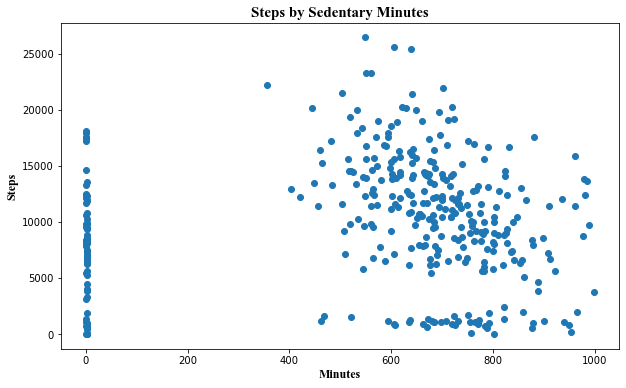

In [61]:
fig = plt.figure(figsize=(10,6))
plt.scatter(fitbit['Minutes Sedentary'], fitbit.Steps)
plt.title('Steps by Sedentary Minutes' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Minutes',  fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.ylabel('Steps', fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.show()


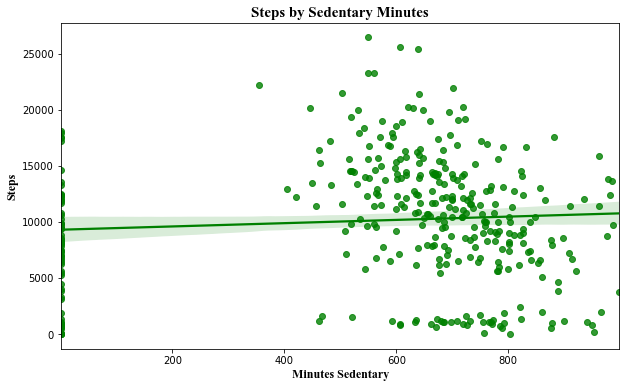

In [62]:
# your code here

fig = plt.figure(figsize=(10,6))
sns.regplot(data = fitbit, x = 'Minutes Sedentary', y = 'Steps', color = 'g')
plt.title('Steps by Sedentary Minutes' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Minutes Sedentary',  fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.ylabel('Steps', fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.show()


```Answer```

    It seems that there is no correlation between those variables. 
    The Pearsons correlation coefficient is almost zero.
    The Spearman correlation coefficient is even negative.
    

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [116]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [63]:
# your code here


corr, _ = pearsonr(fitbit['MinutesOfSleep'], fitbit.Steps)
print('Pearsons correlation: %.2f' % corr)

corr, _ = spearmanr(fitbit['MinutesOfSleep'], fitbit.Steps)
print('Spearman correlation: %.2f' % corr)


Pearsons correlation: 0.13
Spearman correlation: 0.09


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

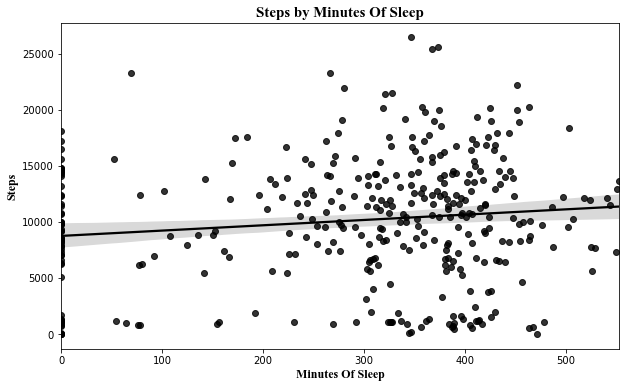

In [64]:
# your code here
fig = plt.figure(figsize=(10,6))
sns.regplot(data = fitbit, x = 'MinutesOfSleep', y = 'Steps', color = 'black')
plt.title('Steps by Minutes Of Sleep' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Minutes Of Sleep',  fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.ylabel('Steps', fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.show()


```Answer```

    It seems that there is no correlation between those variables.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [65]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

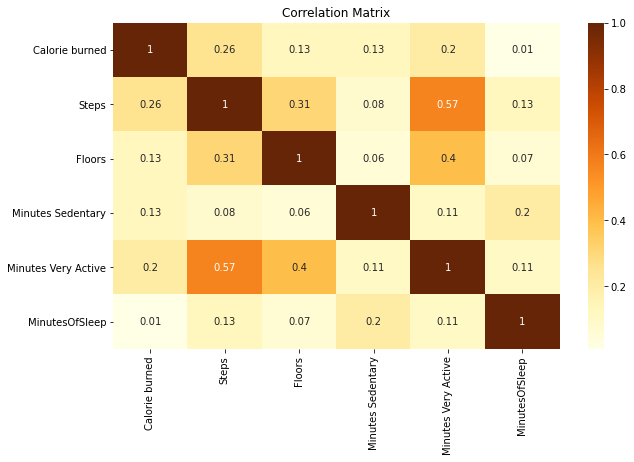

In [67]:
# your code here

sub = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
cor_fit = sub.corr().round(2)

fig = plt.figure(figsize=(10,6))


sns.heatmap(cor_fit, annot=True, cmap = "YlOrBr" )
plt.title('Correlation Matrix')

plt.show()

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [68]:
cor_fit.sort_values(by='Steps', ascending = False)[:1]

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.26,1.0,0.31,0.08,0.57,0.13


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [73]:
# your code here
time_grades = pd.read_csv('Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

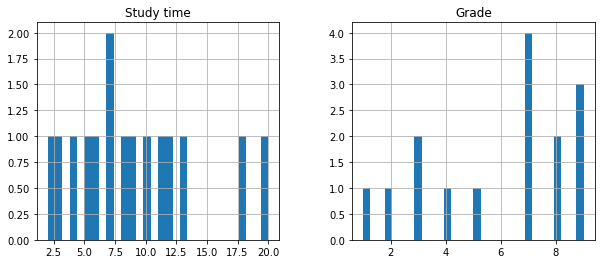

In [74]:
# your code here
time_grades.hist(figsize=(10,4), bins=30)
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [75]:
# your code here

corr, _ = pearsonr(times_grade['Study time'], times_grade.Grade)
print('Pearsons correlation: %.2f' % corr)

corr, _ = spearmanr(times_grade['Study time'], times_grade.Grade)
print('Spearman correlation: %.2f' % corr)


Pearsons correlation: 0.80
Spearman correlation: 0.82


```Answer```

    Yes, there is correlation between both variables.

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

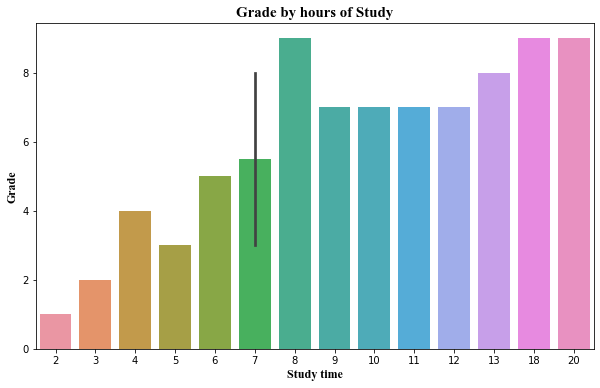

In [80]:
# your code here

fig = plt.figure(figsize=(10,6))
sns.barplot(data = times_grade, x = 'Study time', y = 'Grade') 
plt.title('Grade by hours of Study' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Study time',  fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.ylabel('Grade', fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.show()


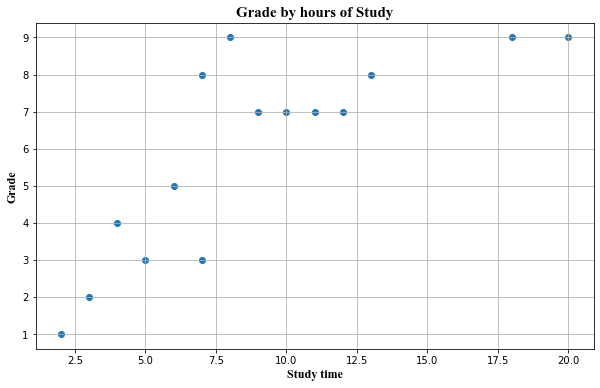

In [81]:
fig = plt.figure(figsize=(10,6))
plt.scatter(times_grade['Study time'], times_grade.Grade)
plt.title('Grade by hours of Study' , fontweight = 'bold', fontsize = 15, fontname = 'times new roman')
plt.xlabel('Study time',  fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.ylabel('Grade', fontweight = 'bold', fontsize = 12, fontname = 'times new roman')
plt.grid(True)
plt.show()



```Answer ```


    There is a high correlation between study time and grades. As study time increases, grades also increase. 

#### Could you explain the difference between Pearson and Spearman correlations?

```Answer ```


    - Spearman correlation is a special case of Pearson's correlation.
    - The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables (the variables tend to change together, but not necessarily at a constant rate).
    - The Pearson correlation evaluates the linear relationship between two continuous variables (a change in one variable is associated with a proportional change in the other variable). 